In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My\ Drive/tobigs/snorrr2

/content/drive/My Drive/tobigs/snorrr2


# Basic COde

In [0]:
!pip install pydub

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import librosa
import pydub 
from fastprogress import master_bar, progress_bar
import numpy as np
import time
import os
import warnings
from sklearn.metrics import classification_report

In [0]:
from pydub import AudioSegment
def freq_augmentation(y, sr):
    switch = np.random.randint(1,3)
    if(switch==1): #고음
        rate = np.random.uniform(2, 5)
    elif(switch==2): #저음
        rate = np.random.uniform(-5, -2)
    y = librosa.effects.pitch_shift(y, sr, n_steps=rate)
    return y

def adding_random_noise(y, noise_rate=0.005):
    rn = np.random.randn(len(y))
    data_rn = y + noise_rate*rn
    return data_rn

def minus_sound(y):
    temp_numpy = (-1)*y
    return temp_numpy

def shifting_sound(data,  roll_rate=0.3):
    # 그냥 [1, 2, 3, 4] 를 [4, 1, 2, 3]으로 만들어주는건데 이게 효과있는지는 잘 모르겠
    data_roll = np.roll(data, int(len(data) * roll_rate))
    return data_roll

def stretch_sound(data, rate=0.7):
    # stretch 해주는거 비율이 뭐가 좋은지 잘모르겟, 0.8이랑, 1.2랑 차이가 안나는거 같음
    stretch_data = librosa.effects.time_stretch(data, rate)
    return stretch_data

def reverse_sound(data):
    temp_array = []
    for i in range(len(data)):
        temp_array.append(data[len(data)-1-i])
    temp_numpy =np.asarray(temp_array)
    return temp_numpy

def adding_white_noise(file_path, sr=22050, noise_quite=25):
    current_dir = '/content/drive/My Drive/tobigs/snorrr2/'
    noise_dir = os.path.join(current_dir, 'noise')
    sound_file = AudioSegment.from_file(file_path)
    # 길이 만큼 random 돌려서 걔 얻기
    file_list = os.listdir(noise_dir)
    noise_file_idx = np.random.randint(0,len(file_list))
    noise_file = AudioSegment.from_file(os.path.join(noise_dir,file_list[noise_file_idx]))
    noise_file = noise_file-noise_quite
    new_sound = sound_file.overlay(noise_file)
    new_sound.export(os.path.join(current_dir, 'temp.mp3'),format='mp3')
    
    wav,sr = librosa.load(os.path.join(current_dir, 'temp.mp3'),sr=sr)
    return wav

In [0]:
def get_mfcc(file_path, isTrain, sr=None, n_fft=2048, hop_length=512, n_mels=128, fmin=20, fmax=8300, top_db=80, norm=0):
    #train에만 aug
    if(isTrain==True):
      switch = np.random.randint(0,3)
      wav,sr = librosa.load(file_path,sr=sr)

      # if switch==1:
      #   wav = adding_white_noise(file_path)
      # elif switch==2:
      #   # random한 개수만큼 개수만큼  변형하기!
      #   aug_num = np.random.randint(1,4)
      #   aug_idx_list = np.random.randint(6,size=aug_num)
      #   aug_func_list = [shifting_sound, stretch_sound, reverse_sound, partial(freq_augmentation,sr=sr), adding_random_noise, minus_sound]
      #   for aug_idx in aug_idx_list:
      #     wav = aug_func_list[aug_idx](wav)
    else:
      wav,sr = librosa.load(file_path,sr=sr)
    print(wav.shape, sr)
    if norm==0:
      print(0)
      wav = librosa.util.normalize(wav)
    elif norm==1:
      print(1)
      wav = 2*((wav - np.min(wav)) / (np.max(wav) - np.min(wav)))-1
    
    # if wav.shape[0]<10*sr:
    #   wav=np.pad(wav,int(np.ceil((10*sr-wav.shape[0]))),mode='reflect')
    if wav.shape[0]<5*sr:
        wav=np.pad(wav,int(np.ceil((5*sr-wav.shape[0])/2)),mode='reflect')
    else:
        # wav=wav[:5*sr]
        wav=wav[5*sr:]
    mfcc = librosa.feature.mfcc(wav, sr, n_mfcc=50) 
    return mfcc

In [0]:
def spec_to_image(spec, eps=1e-6):
    # coefficient mean and variance normalization
    # mean = np.mean(spec, axis=1, keepdims=True) #each coefficient mean
    # std = np.std(spec, axis=1, keepdims=True)
    mean = np.mean(spec)
    std = np.std(spec)
    print(mean.shape, std.shape)
    spec_norm = (spec - mean) / (std + eps)
    return spec_norm

# Amplitude Normalization test

### amplitude 단에서 normalize test

In [0]:
wav, sr =librosa.load('./data/3223_with_record_app.mp3')

In [0]:
np.min(wav), np.max(wav)

(-0.23350148, 0.2620667)

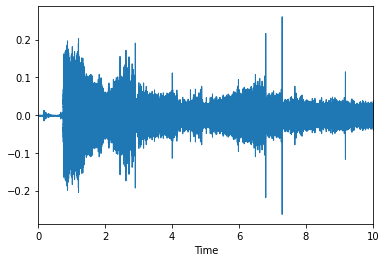

In [0]:
import IPython.display as ipd
import librosa.display
librosa.display.waveplot(wav, sr=sr)
ipd.Audio(wav, rate=sr) # load a NumPy array

In [0]:
wav_norm = librosa.util.normalize(wav)
# wav_norm = 2*((wav - np.min(wav)) / (np.max(wav) - np.min(wav)))-1

In [0]:
np.min(wav_norm), np.max(wav_norm)

(-0.8910002, 1.0)

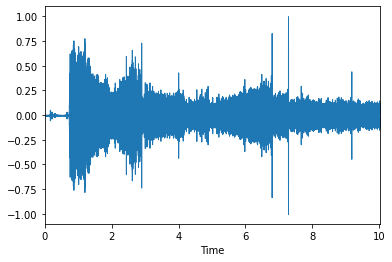

In [0]:
# normalize 후
import IPython.display as ipd
import librosa.display
librosa.display.waveplot(wav_norm, sr=sr)

ipd.Audio(wav_norm, rate=sr) # load a NumPy array

### mfcc로 normalization test

(441000,) 44100
0


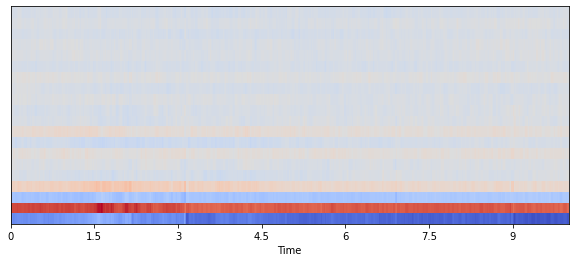

In [0]:
image = get_mfcc('./data/3223.mp3', False, norm=0) 

import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.specshow(image, x_axis='time')

plt.show()


(441000,) 44100


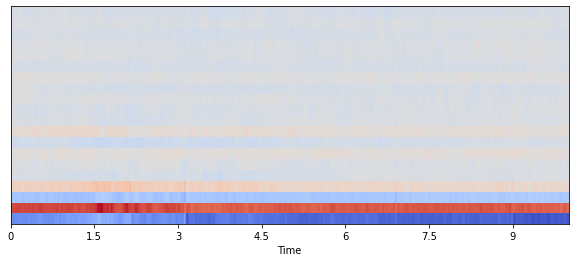

In [0]:
image = get_mfcc('./data/3223.mp3', False, norm=3) 

import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.specshow(image, x_axis='time')

plt.show()


(441767,) 44100
0


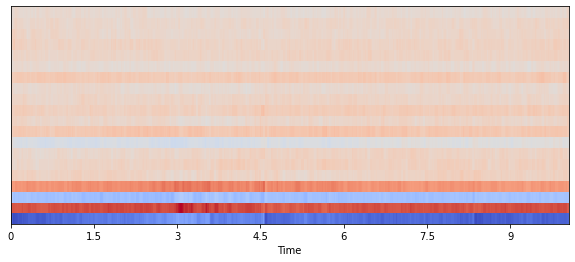

In [0]:
image = get_mfcc('./data/3223_with_record_app.mp3', False,norm=0) 

import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.specshow(image, x_axis='time')

plt.show()


(441767,) 44100


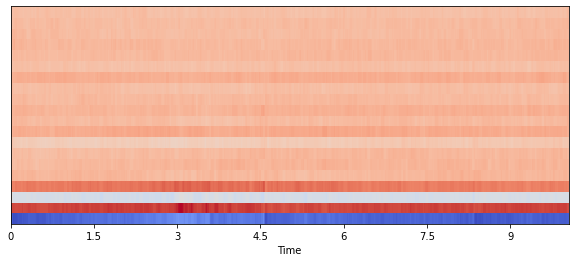

In [0]:
image = get_mfcc('./data/3223_with_record_app.mp3', False, norm=3) 

import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.specshow(image, x_axis='time')

plt.show()


(441022,) 44100
0


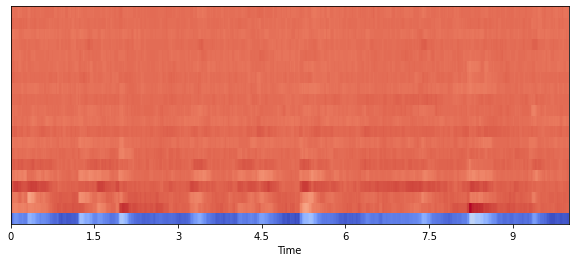

In [0]:
image = get_mfcc('./data/very_quite.wav', False, norm=0) 

import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.specshow(image, x_axis='time')

plt.show()


(441022,) 44100


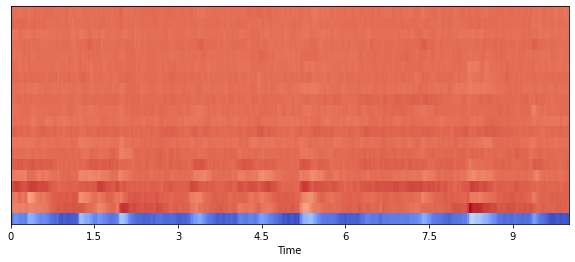

In [0]:
image = get_mfcc('./data/very_quite.wav', False, norm=3) 

import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.specshow(image, x_axis='time')

plt.show()


### 30dB 낮춰도 그림이 같을까? specshow(썼을때)

(441000,) 44100


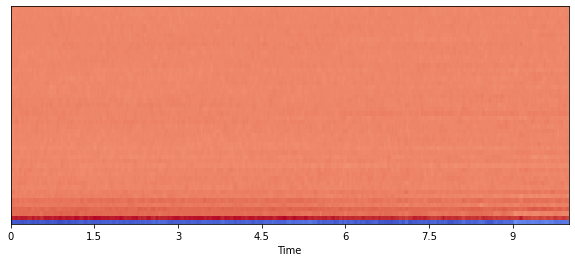

In [0]:
# 전
image = get_mfcc('./data/ve2758_30.mp3', False, norm=3) 

import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.specshow(image, x_axis='time')

plt.show()


spec_show 썼는데도 똑같다..

() ()


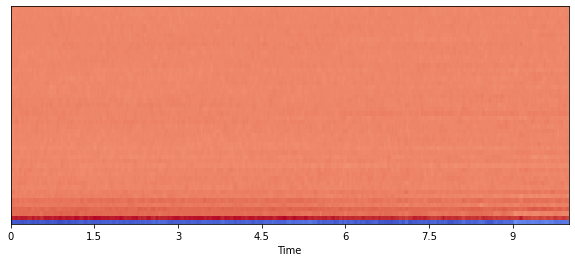

In [0]:
# 후
import matplotlib.pyplot as plt
import librosa.display
image = spec_to_image(image)
plt.figure(figsize=(10, 4))
librosa.display.specshow(image, x_axis='time')

plt.show()


### 30dB 낮춰도 그림이 같을까? normalize

In [0]:
ipd.Audio('./data/ve2758_30.mp3') # load a NumPy array

In [0]:
# 확실히 범위가 좁아짐
a,sr = librosa.load('./data/ve2758_30.mp3')
np.min(a), np.max(a)

(-0.016531933, 0.015571022)

In [0]:
# normalize 하면 좀 넓지?
a = librosa.util.normalize(a)
np.min(a), np.max(a)

(-1.0, 0.94187546)

In [0]:
ipd.Audio(a, rate=sr) # load a NumPy array

(441000,) 44100
0


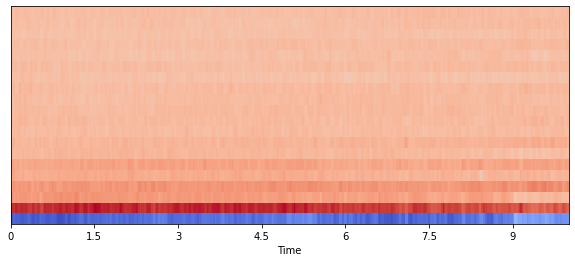

In [0]:
# normalize 한 것
image = get_mfcc('./data/ve2758_30.mp3', False, norm=0) 

import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.specshow(image, x_axis='time')

plt.show()


(441000,) 44100


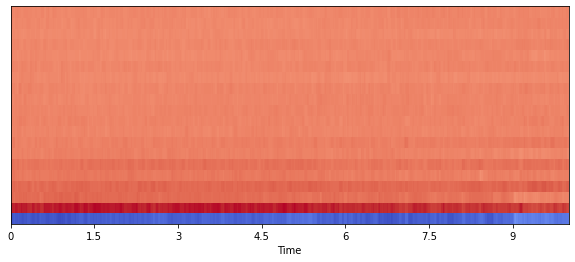

In [0]:
# normalize 안한 것
]image = get_mfcc('./data/ve2758_30.mp3', False, norm=3) 

import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.specshow(image, x_axis='time')

plt.show()


# MFCC 에서 normalize 테스트

In [0]:
### 정규화하기
image = spec_to_image(image)

import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.specshow(image, x_axis='time')

plt.show()
